## ATOC 5860 - Homework 1
### Ash Gilbert
### Due January 30, 2024

#### Packages

In [83]:
%matplotlib inline
import matplotlib   # library for plotting
import matplotlib.pyplot as plt # basic plotting; later you will type plt.$COMMAND
import numpy as np # basic math library  you will type np.$STUFF  e.g., np.cos(1)
import scipy.stats as stats # imports stats functions https://docs.scipy.org/doc/scipy/reference/stats.html  
import xarray as xr  ##netcdf manipulation - slick array manipulation
import pandas as pd

#### Filepaths & open data

In [84]:
# Filepaths
path_to_data = '/Users/ash/Documents/ATOC5860/homeworks/homework1/homework1_data.csv'
path_out_graphs = '/Users/ash/Documents/ATOC5860/homeworks/homework1/'

# Read in data
FtCol_ds = pd.read_csv(path_to_data)

#### Average pressures and standard deviations and Ns

In [85]:
# Calculate means
ps_mean = FtCol_ds['P_hPa'].mean()
ps_rain_mean = FtCol_ds[FtCol_ds.R_inches >= 0.01]['P_hPa'].mean()

print('Average pressure: {:.2f} hPa'.format(ps_mean))
print('Average pressure when raining: {:.2f} hPa'.format(ps_rain_mean))

# Calculate standard devations & Ns
ps_std = FtCol_ds['P_hPa'].std()
ps_rain_std = FtCol_ds[FtCol_ds.R_inches >= 0.01]['P_hPa'].std()
ps_N = FtCol_ds['P_hPa'].count()
ps_rain_N = FtCol_ds[FtCol_ds.R_inches >= 0.01]['P_hPa'].count()

Average pressure: 846.33 hPa
Average pressure when raining: 847.03 hPa


#### Confidence intervals for all pressures

In [86]:
# Calculate t-statistic for 95% CI (using Barnes Chapter 1 Equation (100))
tstat95 = stats.t.ppf(0.975,ps_N-1)
low_tCI95 = ps_mean-tstat95*(ps_std/np.sqrt(ps_N-1))
high_tCI95 = ps_mean+tstat95*(ps_std/np.sqrt(ps_N-1))
print('95% confidence interval - t-statistic: {:.2f} hPa < μ < {:.2f} hPa'.format(low_tCI95,high_tCI95))

# Calculate z-statistic for 95% CI (using Barnes Chapter 1 Equation (90))
zstat95 = stats.norm.ppf(0.975)
low_zCI95 = ps_mean-zstat95*(ps_std/np.sqrt(ps_N))
high_zCI95 = ps_mean+zstat95*(ps_std/np.sqrt(ps_N))
print('95% confidence interval - z-statistic: {:.2f} hPa < μ < {:.2f} hPa'.format(low_zCI95,high_zCI95))

95% confidence interval - t-statistic: 846.21 hPa < μ < 846.45 hPa
95% confidence interval - z-statistic: 846.21 hPa < μ < 846.45 hPa


#### Confidence intervals for pressures when it is raining

In [87]:
# Calculate t-statistic for 95% CI (using Barnes Chapter 1 Equation (100))
tstat95 = stats.t.ppf(0.975,ps_rain_N-1)
low_tCI95_rain = ps_rain_mean-tstat95*(ps_rain_std/np.sqrt(ps_rain_N-1))
high_tCI95_rain = ps_rain_mean+tstat95*(ps_rain_std/np.sqrt(ps_rain_N-1))
print('95% confidence interval - t-statistic: {:.2f} hPa < μ < {:.2f} hPa'.format(low_tCI95_rain,high_tCI95_rain))

# Calculate z-statistic for 95% CI (using Barnes Chapter 1 Equation (90))
zstat95 = stats.norm.ppf(0.975)
low_zCI95_rain = ps_rain_mean-zstat95*(ps_rain_std/np.sqrt(ps_rain_N))
high_zCI95_rain = ps_rain_mean+zstat95*(ps_rain_std/np.sqrt(ps_rain_N))
print('95% confidence interval - z-statistic: {:.2f} hPa < μ < {:.2f} hPa'.format(low_zCI95_rain,high_zCI95_rain))

95% confidence interval - t-statistic: 846.49 hPa < μ < 847.57 hPa
95% confidence interval - z-statistic: 846.49 hPa < μ < 847.57 hPa


#### Bootstrapping

In [88]:
# Initialize bootstrapping variables
Nbstp = 1000 # number bootstrapping reps
P_boot = np.empty((Nbstp,ps_rain_N),dtype=float) # bootstrapped data

# Bootstrap data
for i in range(Nbstp):
    P_boot[i,:] = np.random.choice(FtCol_ds['P_hPa'].values,ps_rain_N)
P_boot_means = np.mean(P_boot,axis=1)

# Calculate statistics for bootstrapped means
P_boot_avg = np.mean(P_boot_means)
P_boot_std = np.std(P_boot_means)
P_boot_min = np.min(P_boot_means)
P_boot_max = np.max(P_boot_means)

print('Mean of bootstrapped means: {:.2f} hPa'.format(P_boot_avg))
print('Standard deviation of bootstrapped means: {:.2f} hPa'.format(P_boot_std))
print('Minimum of bootstrapped means: {:.2f} hPa'.format(P_boot_min))
print('Maximum of bootstrapped means: {:.2f} hPa'.format(P_boot_max))

Mean of bootstrapped means: 846.34 hPa
Standard deviation of bootstrapped means: 0.29 hPa
Minimum of bootstrapped means: 845.41 hPa
Maximum of bootstrapped means: 847.34 hPa


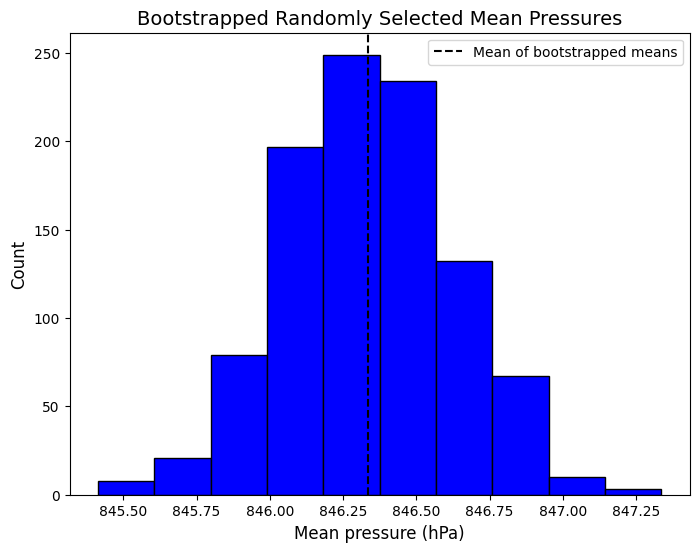

In [89]:
# Plot histogram of bootstrapped means
# Set up figure
fig, ax = plt.subplots(1,1)
fig.set_size_inches(8,6)

# Plotting
ax.hist(P_boot_means,edgecolor='k',color='b',zorder=1)
ax.axvline(P_boot_avg,color='k',ls='--',zorder=2,label='Mean of bootstrapped means')

# Formatting
ax.set_xlabel('Mean pressure (hPa)',fontsize=12)
ax.set_ylabel('Count',fontsize=12)
ax.legend()
ax.set_title('Bootstrapped Randomly Selected Mean Pressures',fontsize=14)

fig.savefig(path_out_graphs+'BootstrapPressures_Histogram.png',dpi=400)

In [90]:
# Probability of getting the average pressure while raining by chance
# Calculate z-statistic of average pressure while raining (using Barnes Chapter 1 Equation (83))
z_rain = (ps_rain_mean-P_boot_avg)/(P_boot_std/np.sqrt(1)) 

# Calculate probability this happened by chance - two-tailed
prob_rain = (1-stats.norm.cdf(np.abs(z_rain)))*2*100

print('sample mean (average pressure while raining): {:.2f} hPa'.format(ps_rain_mean))
print('sample size: 1')
print('population mean (average of bootstrapped mean pressures): {:.2f} hPa'.format(P_boot_avg))
print('population standard deviation (standard deviation of bootstrapped mean pressures): {:.2f} hPa'.format(P_boot_std))
print('z-statistic (# of standard errors sample mean is from population mean): {:.2f}'.format(z_rain))
print('Probability of getting average pressure while raining by chance: {:.2f}%'.format(prob_rain))

sample mean (average pressure while raining): 847.03 hPa
sample size: 1
population mean (average of bootstrapped mean pressures): 846.34 hPa
population standard deviation (standard deviation of bootstrapped mean pressures): 0.29 hPa
z-statistic (# of standard errors sample mean is from population mean): 2.42
Probability of getting average pressure while raining by chance: 1.54%
